<a href="https://colab.research.google.com/github/th-shristi/NeuroNexus/blob/main/IRIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
#Importing libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [9]:
df = pd.read_csv("/content/IRIS.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
features = df.drop(['species'],axis=1)
features.shape

(150, 4)

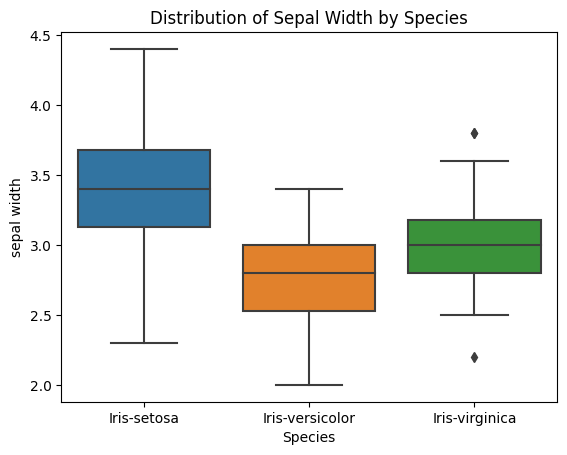

In [11]:
#Data Visualization
sns.boxplot(x='species', y='sepal_width', data=df)
plt.xlabel('Species')
plt.ylabel('sepal width')
plt.title('Distribution of Sepal Width by Species')
plt.show()

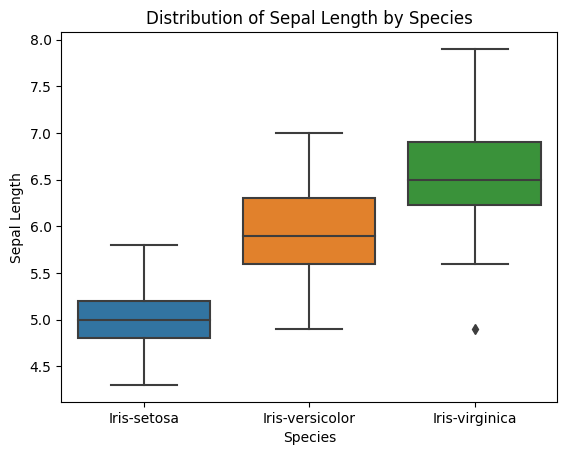

In [12]:
sns.boxplot(x='species', y='sepal_length', data=df)
plt.xlabel('Species')
plt.ylabel('Sepal Length')
plt.title('Distribution of Sepal Length by Species')
plt.show()

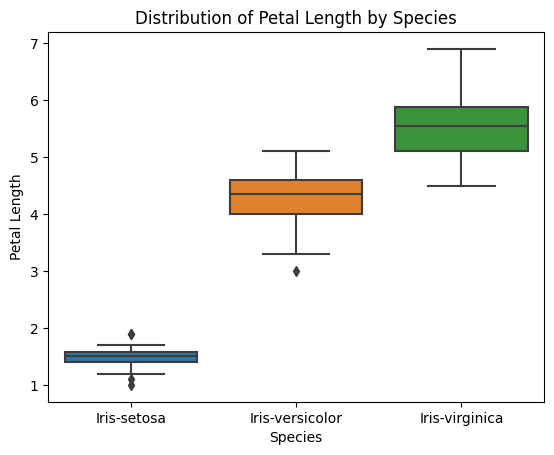

In [13]:
sns.boxplot(x='species', y='petal_length', data=df)
plt.xlabel('Species')
plt.ylabel('Petal Length')
plt.title('Distribution of Petal Length by Species')
plt.show()

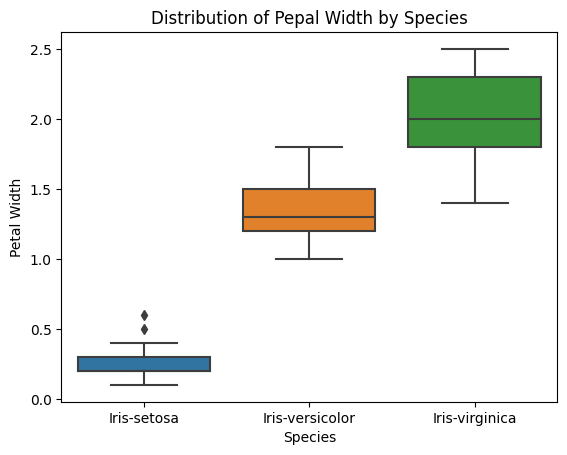

In [14]:
sns.boxplot(x='species', y='petal_width', data=df)
plt.xlabel('Species')
plt.ylabel('Petal Width')
plt.title('Distribution of Pepal Width by Species')
plt.show()

In [15]:
#Decision tree
x=features
y=df['species']
x_trainset, x_testset, y_trainset, y_testset = train_test_split(x, y, test_size=0.3, random_state=3)

In [16]:
print('Shape of x training set {}'.format(x_trainset.shape),'&',' Size of y training set {}'.format(y_trainset.shape))

Shape of x training set (105, 4) &  Size of y training set (105,)


In [17]:
print('Shape of X training set {}'.format(x_testset.shape),'&',' Size of Y training set {}'.format(y_testset.shape))

Shape of X training set (45, 4) &  Size of Y training set (45,)


In [18]:
#Model
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
irisTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
irisTree


DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [19]:
irisTree.fit(x_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [20]:
#Prediction
predTree = irisTree.predict(x_testset)
print (predTree [0:5])
print (y_testset [0:5])

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa']
47    Iris-setosa
3     Iris-setosa
31    Iris-setosa
25    Iris-setosa
15    Iris-setosa
Name: species, dtype: object


In [21]:
from sklearn import metrics
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.8888888888888888


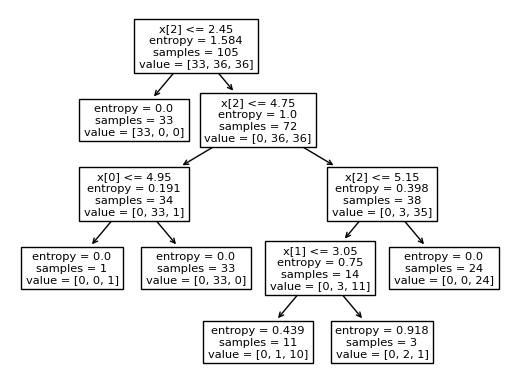

In [22]:
tree.plot_tree(irisTree)
plt.show()

In [23]:
#Accuracy using other algorithms
scores1 = cross_val_score(RandomForestClassifier(n_estimators=5),x_trainset,y_trainset, cv=10)
np.average(scores1)


0.9327272727272728

In [24]:
scores2 = cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'),x_trainset,y_trainset, cv=10)
np.average(scores2)

0.9627272727272727

In [25]:
scores3 = cross_val_score(SVC(gamma='auto'),x_trainset,y_trainset, cv=10)
np.average(scores3)

0.9809090909090911

Hence, the model with the best performance is the support vector machine.